In [1]:
import pandas as pd

def get_data():
    dataframes = []
    
    for p in range(1, 13):
        url = 'http://www.espn.com/nba/statistics/rpm/_/page/{0}'.format(p)
        
        table = pd.read_html(url, skiprows=0, header=0)[0]
        
        for c in table.columns:
            table[c] = pd.to_numeric(table[c], errors='ignore')    

        table['PLAYER'] = table['NAME'].apply(lambda x: x.split(',')[0])
        table = table.drop(columns=['NAME'])
#         table = table.set_index('NAME', drop=True)
        
        dataframes.append(table)
    
    return pd.concat(dataframes)


In [2]:
rpm = get_data()

In [3]:
rpm.head()

,RK,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,PLAYER
0,1,HOU,38,37.1,7.76,-0.06,7.70,8.89,James Harden
1,2,NO,38,36.9,3.93,3.24,7.17,9.24,Anthony Davis
2,3,OKC,41,35.7,3.82,2.85,6.67,8.75,Paul George
3,4,DEN,41,31.3,4.46,1.83,6.29,7.01,Nikola Jokic
4,5,BOS,38,32.1,4.60,0.92,5.52,6.01,Kyrie Irving


In [4]:
def get_per():
    
    tables = []
    for p in range(1, 8):
        url = 'http://insider.espn.com/nba/hollinger/statistics/_/page/{0}'.format(p)
        
        table = pd.read_html(url, skiprows=0, header=1)[0]
        table = table[table['PLAYER'] != 'PLAYER']
        for c in table.columns:
            table[c] = pd.to_numeric(table[c], errors='ignore')    

        table['PLAYER'] = table['PLAYER'].apply(lambda x: x.split(',')[0])
#         table = table.set_index('PLAYER', drop=True)
        tables.append(table)
    
    return pd.concat(tables)
        
per = get_per()

In [5]:
per.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA
0,1.0,Anthony Davis,38,36.9,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,410.4,13.7
1,2.0,James Harden,38,37.1,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,382.7,12.8
2,3.0,Giannis Antetokounmpo,38,33.6,0.630,19.2,13.1,31.6,7.9,30.3,19.7,29.09,335.2,11.2
3,4.0,Kawhi Leonard,34,34.6,0.610,11.4,7.4,29.2,4.1,20.2,12.4,26.95,288.9,9.6
4,5.0,LeBron James,34,34.6,0.601,21.5,10.3,31.8,2.9,21.2,12.3,26.44,280.3,9.3


In [29]:
merged = pd.merge(per, rpm, how='left', on='PLAYER')
merged = merged.set_index(drop=True, keys
                 =['PLAYER'])

In [30]:
merged.head()

,RK_x,GP_x,MPG_x,TS%,AST,TO,USG,ORR,DRR,REBR,...,VA,EWA,RK_y,TEAM,GP_y,MPG_y,ORPM,DRPM,RPM,WINS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Anthony Davis,1.0,38,36.9,0.598,14.3,6.7,29.3,10.0,27.7,19.1,...,410.4,13.7,2,NO,38,36.9,3.93,3.24,7.17,9.24
James Harden,2.0,38,37.1,0.622,20.8,13.5,40.0,2.1,17.0,9.3,...,382.7,12.8,1,HOU,38,37.1,7.76,-0.06,7.70,8.89
Giannis Antetokounmpo,3.0,38,33.6,0.630,19.2,13.1,31.6,7.9,30.3,19.7,...,335.2,11.2,10,MIL,38,33.6,2.37,2.18,4.55,6.39
Kawhi Leonard,4.0,34,34.6,0.610,11.4,7.4,29.2,4.1,20.2,12.4,...,288.9,9.6,28,TOR,34,34.6,3.05,-0.18,2.87,4.49
LeBron James,5.0,34,34.6,0.601,21.5,10.3,31.8,2.9,21.2,12.3,...,280.3,9.3,9,LAL,34,34.6,3.65,1.35,5.00,6.44


In [31]:
merged = merged.sort_values(by='RPM', ascending=False)

In [32]:
merged.columns

Index(['RK_x', 'GP_x', 'MPG_x', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'RK_y', 'TEAM', 'GP_y', 'MPG_y', 'ORPM',
       'DRPM', 'RPM', 'WINS'],
      dtype='object')

In [33]:
top_rpm = merged.sort_values(by='RPM', ascending=False).head(n=100)[['RPM', 'PER']]

In [34]:
top_rpm['Ratio'] = top_rpm.PER / top_rpm.RPM

In [35]:
from scipy import stats



In [36]:
top_rpm

,RPM,PER,Ratio
PLAYER,,,
James Harden,7.70,29.21,3.793506
Anthony Davis,7.17,31.09,4.336123
Paul George,6.67,23.29,3.491754
Nikola Jokic,6.29,26.09,4.147854
Kyrie Irving,5.52,24.55,4.447464
Stephen Curry,5.27,25.96,4.925996
Nikola Vucevic,5.16,25.90,5.019380
Kyle Lowry,5.09,18.23,3.581532
LeBron James,5.00,26.44,5.288000


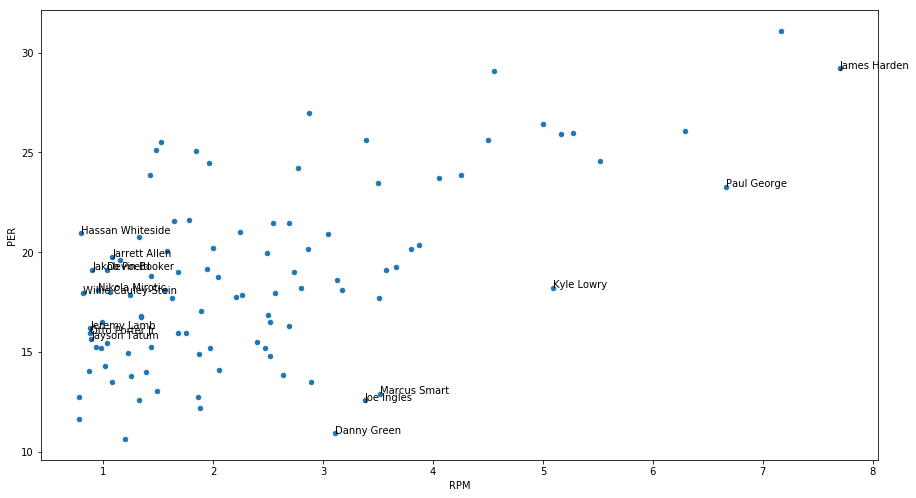

In [37]:
import matplotlib.pyplot as plt
a4_dims = (15, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

top_rpm.plot(ax=ax, kind='scatter', x='RPM', y='PER')

for i, txt in top_rpm.iterrows():
    if txt.Ratio < 4 or txt.Ratio > 17.5:
        ax.annotate(txt.name, (txt.RPM, txt.PER))
        
plt.show()

In [ ]:
merged.plot(kind='scatter', x='USG', y='RPM')

In [44]:
merged = merged[['MPG_x', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'TEAM', 'ORPM',
       'DRPM', 'RPM', 'WINS']]

In [46]:
merged = merged.rename(columns={'MPG_x': 'MPG'})

In [51]:
cols = list(merged.columns)

In [52]:
cols.insert(1, cols.pop(cols.index('TEAM')))

In [55]:
merged = merged.reindex(columns= cols)

In [56]:
merged.to_csv('../data/advanced_metrics.csv')